In [18]:
import zipfile as zf
files = zf.ZipFile("validate/false.zip")
files.extractall('validate/')
files.close()

In [8]:
import os
os.listdir('true/')

['b6b3a0b5d07842a3cafc37cc035b1c1617ada5a1.tif',
 '7567fbd30736fb970b7d84730339492ed2a12e20.tif',
 '2343a0ecfab8a190f4bc0b0008428acd54e3e9be.tif',
 '396cb84ead16c9ab6d874be00125a057fd33d401.tif',
 '8979373690224fc8837f54d54ab76ceed8c03df5.tif',
 'e609066531edbb68d2214bda4c6cd273a7de0885.tif',
 '71c8a1a197daa7177ced8bbcc28c296f4b499d68.tif',
 'eb5b95b0385260fa9196b42959a5957bf8cc1af8.tif',
 'a6314511be4c6b81e850eef8b6606c7fb8ca7f48.tif',
 '8141565c826e1878bf448419e49e55f4d6b5b8a4.tif',
 'b001544be8311653ec635890049bcfbfd46dbe4b.tif',
 'b00ba562cb8449bc1b679ad4678a49ec0f278012.tif',
 '73e0b86276c08d95d348de4654a4d9acdffe7b52.tif',
 '83e59034a140057ab90f327400f4c1b1b6fad6e7.tif',
 'e727206d8a0a1ac749eef545674c618a2be45d98.tif',
 '20bdacb58b4880ea43fa6061456f2ecf99bcb2f6.tif',
 'ed85026371718312c14f208733a60ae98e4d8828.tif',
 '96c654d56cdf1e10cb28622b89f60303e7187e47.tif',
 '9aaabec39f2bf1c018c87c970f6a621f830f66b5.tif',
 '9bda869e95fb9964c21e1a26829b65ff35b98888.tif',
 'abf53e5a1268407b6d

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

dtypes = {
        'id'            : 'str',
        'label'           : 'int8',
        }
train_labels = pd.read_csv('train_labels.csv',dtype = dtypes)
train_labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [25]:
#balance 0 and 1 in train data
np.random.seed(23333)
train_labels.groupby(['label']).size() #0:130908 1: 89117
index = np.where(train_labels['label']==0)[0]
index = np.random.choice(index,89117,replace=False)

index = np.concatenate([index,np.where(train_labels['label']==1)[0]])
index,len(index)

(array([ 23438,  78108, 110289, ..., 220014, 220021, 220024]), 178234)

In [26]:
#split train to new train/validate
n = len(train_labels)
X_train, X_test, y_train, y_test = train_test_split(train_labels.iloc[index]['id'], train_labels.iloc[index]['label'], test_size=0.2, random_state=23333)

In [15]:
sum(y_train==0)

71257

In [8]:
#balance 0 and 1 in train data
np.random.seed(23333)
train_labels.groupby(['label']).size() #0:130908 1: 89117
index = np.where(train_labels['label']==0)[0]
index = np.random.choice(index,89117,replace=False)

index = np.concatenate([index,np.where(train_labels['label']==1)[0]])
index,len(index)

(array([ 23438,  78108, 110289, ..., 220014, 220021, 220024]), 178234)

In [15]:
sum(y_train==0)

71257

In [8]:
#balance 0 and 1 in train data
np.random.seed(23333)
train_labels.groupby(['label']).size() #0:130908 1: 89117
index = np.where(train_labels['label']==0)[0]
index = np.random.choice(index,89117,replace=False)

index = np.concatenate([index,np.where(train_labels['label']==1)[0]])
index,len(index)

(array([ 23438,  78108, 110289, ..., 220014, 220021, 220024]), 178234)

In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7941129754037897178, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15868438119
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12044241789580775273
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: d6ae:00:00.0, compute capability: 6.0"]

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(True,True,True,True,
        rescale=1./255,
        rotation_range=40,                           
#         shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip= True)

train_generator = train_datagen.flow_from_directory(
    directory="train/",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=23333
)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 142587 images belonging to 2 classes.


In [3]:
valid_datagen = ImageDataGenerator(True,True,True,True,
        rescale=1./255,
        rotation_range=40,                           
#         shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip= True)

valid_generator = valid_datagen.flow_from_directory(
    directory="validate/",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=23333
)

Found 35647 images belonging to 2 classes.


In [40]:
os.rmdir('validate/.ipynb_checkpoints')

In [43]:
import keras
from keras.models import load_model
cnn1 = load_model('07-0.28.h5')


KeyError: 0

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Dense, Dropout, Flatten
import numpy as np

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(96,96,3)))
cnn1.add(BatchNormalization())

cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Flatten())

cnn1.add(Dense(512, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(128, activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(2, activation='softmax'))

cnn1.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2),
             keras.callbacks.ModelCheckpoint(filepath='{epoch:02d}-{val_loss:.2f}.h5',
                                             monitor='val_loss', save_best_only=True)]

In [47]:
hist = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=10, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
                  callbacks = callbacks)

Epoch 1/10


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4456/4456 [==============================] - 1986s 446ms/step - loss: 0.4081 - acc: 0.8178 - val_loss: 0.3192 - val_acc: 0.8652
Epoch 2/10
4456/4456 [==============================] - 1845s 414ms/step - loss: 0.3323 - acc: 0.8577 - val_loss: 0.3114 - val_acc: 0.8655
Epoch 3/10
4456/4456 [==============================] - 1839s 413ms/step - loss: 0.2999 - acc: 0.8752 - val_loss: 0.2715 - val_acc: 0.8895
Epoch 4/10
4456/4456 [==============================] - 1856s 417ms/step - loss: 0.2812 - acc: 0.8851 - val_loss: 0.2803 - val_acc: 0.8790
Epoch 5/10
4456/4456 [==============================] - 1827s 410ms/step - loss: 0.2643 - acc: 0.8932 - val_loss: 0.3122 - val_acc: 0.8660


In [ ]:
train_acc = [0.8178,0.8577,0.8752,0.8851,0.8932,0.8989,0.9008,0.9056,0.9070,0.9100]
train_loss = [0.4081,0.3323,0.2999,0.2812,0.2643,0.2527,0.2479,0.2402,0.2352,0.2298]
valid_acc = [0.8652,0.8655,0.8895,0.8790,0.8660,0.9091,0.8919,0.9109,0.9224,0.8850]
valid_loss = [0.3192,0.3114,0.2715,0.2803,0.3122,0.2343,0.2582,0.2243,0.2015,0.2584]

In [63]:
import keras
from keras.models import load_model
cnn1 = load_model('08-0.22.h5')
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2),
             keras.callbacks.ModelCheckpoint(filepath='{epoch:02d}-{val_loss:.2f}.h5',
                                             monitor='acc', save_best_only=True)]

In [62]:
hist = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=20, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
                  callbacks = callbacks,
                         initial_epoch = 5)

Epoch 6/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4456/4456 [==============================] - 1859s 417ms/step - loss: 0.2527 - acc: 0.8989 - val_loss: 0.2343 - val_acc: 0.9091
Epoch 7/20
4456/4456 [==============================] - 1865s 418ms/step - loss: 0.2479 - acc: 0.9008 - val_loss: 0.2582 - val_acc: 0.8919
Epoch 8/20
4456/4456 [==============================] - 1834s 412ms/step - loss: 0.2402 - acc: 0.9056 - val_loss: 0.2243 - val_acc: 0.9109
Epoch 9/20
4456/4456 [==============================] - 1856s 417ms/step - loss: 0.2336 - acc: 0.9083 - val_loss: 0.2693 - val_acc: 0.8827
Epoch 10/20
4456/4456 [==============================] - 1844s 414ms/step - loss: 0.2294 - acc: 0.9101 - val_loss: 0.2616 - val_acc: 0.8933


In [64]:
hist

In [65]:
hist1 = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=20, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
                  callbacks = callbacks,
                         initial_epoch = 8)

Epoch 9/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4456/4456 [==============================] - 1874s 421ms/step - loss: 0.2352 - acc: 0.9070 - val_loss: 0.2015 - val_acc: 0.9224
Epoch 10/20
4456/4456 [==============================] - 1874s 420ms/step - loss: 0.2298 - acc: 0.9100 - val_loss: 0.2584 - val_acc: 0.8850
Epoch 11/20
4456/4456 [==============================] - 1872s 420ms/step - loss: 0.2249 - acc: 0.9125 - val_loss: 0.2138 - val_acc: 0.9119


In [67]:
cnn1= load_model('11-0.21.h5')
hist2 = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=20, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
                  callbacks = callbacks,
                         initial_epoch = 11)

Epoch 12/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4456/4456 [==============================] - 1878s 422ms/step - loss: 0.2231 - acc: 0.9130 - val_loss: 0.2060 - val_acc: 0.9185
Epoch 13/20
4456/4456 [==============================] - 1866s 419ms/step - loss: 0.2187 - acc: 0.9151 - val_loss: 0.2006 - val_acc: 0.9206
Epoch 14/20
4456/4456 [==============================] - 1884s 423ms/step - loss: 0.2175 - acc: 0.9155 - val_loss: 0.2197 - val_acc: 0.9100
Epoch 15/20
4456/4456 [==============================] - 1877s 421ms/step - loss: 0.2133 - acc: 0.9173 - val_loss: 0.2182 - val_acc: 0.9110


In [ ]:
y_0 = y_test==1
y_0 = y_test[y_0]
ids = np.random.choice(y_0.keys(),30,False)
model = load_models('09-020.h5')
for i in ids:
    file = '~/validate/true/'+i+'.tif'
    image = np.array(file)
    model

In [68]:
cnn1= load_model('15-0.22.h5')
hist3 = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=20, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
                  callbacks = callbacks,
                         initial_epoch = 15)

Epoch 16/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4456/4456 [==============================] - 1857s 417ms/step - loss: 0.2099 - acc: 0.9196 - val_loss: 0.2256 - val_acc: 0.9030
Epoch 17/20
4456/4456 [==============================] - 1860s 417ms/step - loss: 0.2098 - acc: 0.9190 - val_loss: 0.2408 - val_acc: 0.8993
Epoch 18/20
4456/4456 [==============================] - 1840s 413ms/step - loss: 0.2075 - acc: 0.9202 - val_loss: 0.2414 - val_acc: 0.8958


In [8]:
cnn1= load_model('18-0.24.h5')
hist3 = cnn1.fit_generator(train_generator, 
                   steps_per_epoch=np.ceil(142587 / 32), 
                   epochs=20, 
                   verbose=1,
                   validation_data=valid_generator,
                   validation_steps = np.ceil(35647 / 32),
#                   callbacks = callbacks,
                         initial_epoch = 18)

Epoch 19/20


/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


 428/4456 [=>............................] - ETA: 26:16 - loss: 0.2058 - acc: 0.9233

KeyboardInterrupt: 

In [20]:
train_acc = [0.8178,0.8577,0.8752,0.8851,0.8932,0.8989,0.9008,0.9056,0.9070,0.9100,0.9125,0.9130,0.9151,0.9155,0.9173,0.9196,0.9190,0.9202,0.9185,0.9223]
train_loss = [0.4081,0.3323,0.2999,0.2812,0.2643,0.2527,0.2479,0.2402,0.2352,0.2298,0.2249,0.2231,0.2187,0.2175,0.2133,0.2099,0.2098,0.2075,0.1995,0.2037]
valid_acc = [0.8652,0.8655,0.8895,0.8790,0.8660,0.9091,0.8919,0.9109,0.9224,0.8850,0.9119,0.9185,0.9206,0.9100,0.9110,0.9030,0.8993,0.8958,0.9158,0.9114]
valid_loss = [0.3192,0.3114,0.2715,0.2803,0.3122,0.2343,0.2582,0.2243,0.2015,0.2584,0.2138,0.2060,0.2006,0.2197,0.2182,0.2256,0.2408,0.2414,0.2052,0.2103]

In [9]:
from keras.models import load_model
import numpy as np
cnn1= load_model('19-0.20.h5')
cnn1.evaluate_generator(train_generator,steps = np.ceil(142587 / 32))

/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[0.19951312608527652, 0.918470828333458]

In [30]:
from sklearn.metrics import roc_curve
model = load_model('09-0.20.h5')

/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:594: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.6/site-packages/keras/preprocessing/image.py:602: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


ValueError: Found input variables with inconsistent numbers of samples: [35647, 71294]

In [50]:
from sklearn.metrics import roc_auc_score
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    directory="validate/",
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)                                            
test_steps = np.ceil(test_generator.samples/test_generator.batch_size)
true_classes = test_generator.classes
predictions = model.predict_generator(generator = test_generator, steps = test_steps)
# y_pred_keras = model.predict_generator(y).ravel()
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

Found 35647 images belonging to 2 classes.


auc score from generator 0.42173955984437217


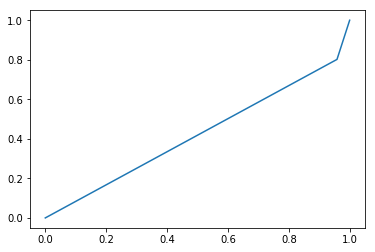

In [52]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true = true_classes, y_score = (predictions[:,0]>predictions[:,1]).astype(int))
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, (predictions[:,0]>predictions[:,1]).astype(int))
print('auc score from generator', auc)
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})')


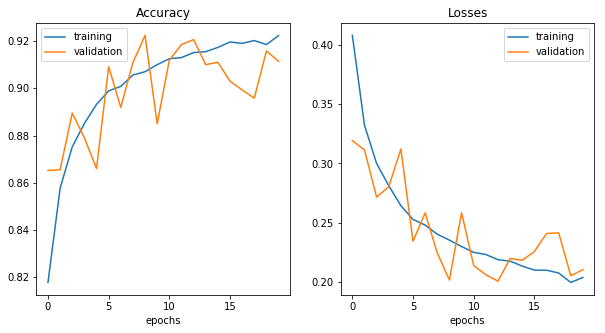

In [18]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1,2,figsize = (10,5))
axarr[0].plot(train_acc)
axarr[0].plot(valid_acc)
axarr[0].set_title('Accuracy')
axarr[0].legend(['training','validation'])
axarr[1].plot(train_loss)
axarr[1].plot(valid_loss)
axarr[1].set_title('Losses')
axarr[1].legend(['training','validation'])
for ax in axarr.flat:
    ax.set(xlabel='epochs')


In [1]:
from keras.models import load_model
import numpy as np
cnn1= load_model('19-0.20.h5')
cnn1.summary()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 92, 92, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 92, 92, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 44, 44, 64)        18496     
__________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  # This is added back by InteractiveShellApp.init_path()


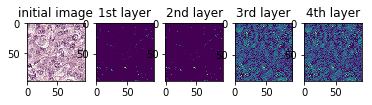

In [18]:
from keras import models
import matplotlib.pyplot as plt
test_im = plt.imread('train/true/d9616084e2957be77682398aa644e49dcbfa02a5.tif')
cnn1 = load_model('09-0.20.h5')

# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn1.layers[:8]]


# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn1.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,96,96,3))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 3rd channel of the activation of the 1st layer of the original model
# fig.add_subplot(3,1,1)
plt.subplot(151)
plt.imshow(test_im)
plt.title('initial image')
plt.subplot(152)
plt.imshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.title('1st layer')
# fig.add_subplot(3,1,2)
plt.subplot(153)
plt.imshow(activations[1][0, :, :, 3], cmap='viridis')
plt.title('2nd layer')
# fig.add_subplot(3,1,3)
plt.subplot(154)
plt.imshow(activations[2][0, :, :, 3], cmap='viridis')
plt.title('3rd layer')
plt.subplot(155)
plt.imshow(activations[3][0, :, :, 3], cmap='viridis')
plt.title('4th layer')
plt.savefig('im1.png')

In [25]:
valid_acc[8]

0.9224

In [26]:
valid_loss[8]

0.2015